In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Coordinate optimization

Coordinate optimization are optimization techniques that work by running optimization on each coordinate of the function, iteratively, by keeping the rest of the coordinate fixes to their last updated values.

This means that if we are running optimization on a function with domain $x\in\mathbb{R}^d$ then coordinate optimization finds the minimum/maximum by alternating steps at each iteration $k$:

\begin{split}
x_1^{(k)} &= \text{argmin} f(x_1,x_2^{(k-1)},x_3^{(k-1)},\dots,x_d^{(k-1)})\\
x_2^{(k)} &= \text{argmin} f(x_1^{k},x_2,x_3^{(k-1)},\dots,x_d^{(k-1)})\\
x_3^{(k)} &= \text{argmin} f(x_1^{k},x_2^{k},x_3^{(k)},\dots,x_d^{(k-1)})\\
&\vdots
\end{split}

Important things:

* The order in which we update each coordinate does not matter when the problem is convex and well-conditioned. When is non-convex different update orders can lead to different minimas.
* We can update block of coordinates if their updated values do not interact with the optima of other variable.
* If variables are totally decopuled the number of iterations is exactly $k$.
* Compared to gradient descent we know:
    * It can be faster than gradient descent because it uses information beyond the first order derivative.
    * Can work with discrete spaces.
    * Can work with non-differentiable functions for example Lasso regression, yet not always. For example when we have non-differentiable functions where the non-differentiable part is coupled (i.e it does not occur at points where the other variable is fixed $x=a$). Gradient descent works with non-differentiable functions by using the concept of subgradient.
    * Converges quicker than standard gradient descent for functions with non-constant curvature, even if the learning rate is adapted on the fly to account for the curvature (which implies a higher cost).
    * Can be faster than gradient descent by reusing computations.
    * In convex functions, only when the Hessian is $I$ or we initialize the points right in the direction of the function Eigenvectors, gradient descent can achieve the optimum in one step. Coordinate descent only requires one whole iteration, which is computationally as expensive as computing a full gradient.
* The coordinate gradient descent variant can lead to different minima depending on the learning rate and the initial point. It also does not guarantee that the cost is minimized at each iteration.
* It is used in very popular algorithms such as linear regresion with L1 regularization (aka Lasso), Kmeans and the well-known Expectation maximization algorithm, to learn in probabilistic graphical models.

At a very high level we could find two variants of coordinate optimization. The first variant considers the cases in which we can perform exact minimization on a coordinate, by keeping the other fixed. When this is possible, we know:

* 1. The point obtained is minimum/maximum.
* 2. By running succesively on each coordinate we never increase the function value.

Consider for example the cuadratic function:

\begin{split}
f(x,y) =  x^2 + y^2
\end{split}

Coordinate descent will first minimize alongside the $x$ dimension. Taking $\nabla_x f(x,y) = 0$, which gives $x=0$. Now giving this value fixed take $\nabla_y f(x,y) = 0$, which gives $y$. 

Here the partial derivatives do not depend on the other variable, when it depends then the most updated value must be used, as it is the case of kmeans algorithm, or expectation maximization in graphical models. As an example consider:

\begin{split}
f(x,y) = x^2 +xy + y^2; y_0 = 1 
\end{split}

Then the sequence of steps would be something like:

\begin{split}
(x_0,y_0) &= (-0.5,1) \\
(x_0,y_1) &= (-0.5,0.25) \\
(x_1,y_1) &= (-0.125,0.25) \\
\vdots\\
(x_k,y_k) &= (0,0)
\end{split}

When exact minimization is not possible, then we can run gradient descent just on that coordinate. In these cases moving in one direction might increase the overall loss in the other. Minimization is only guaranteed when exact minimization on each coordinate can be performed.

### Initial visualization of coordinate descent.

Consider the function $x^2 +xy + y^2$, let's look at the idea behind coordinate descent.

The steps on each direction are given by:

\begin{split}
\frac{\partial f(x,y)}{\partial x} = -\frac{y}{2} \\
\frac{\partial f(x,y)}{\partial y} = -\frac{x}{2} 
\end{split}

This function is coupled because the minimum of one variable depends on the value of the other. In these cases minimization cannot be performed in $d$ steps and depends on the initialization and the convergence rate.

In [2]:
%matplotlib tk
plt.close("all")

sleep_time = 0.1
use_input = False

def fun(x,y):
    return x**2 + x*y + y**2

def coord_update_x(x,y):
    return - y / 2

def coord_update_y(x,y):
    return - x / 2

## function
N_points = 300
x_grid = np.linspace(-20,20,N_points)
y_grid = np.linspace(-20,20,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = -15
y_cd = -15

## Initial plot
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, projection='3d')
ax2.view_init(elev=45) #, azim=90)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)    
if use_input:
    input("")


ax1.contour(X_mesh,Y_mesh, Z_mesh, cmap = 'gray', levels = 50)
ax1.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)
ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")
ax1.set_xlabel('coordinate x')
ax1.set_ylabel('coordinate y')

ax2.plot_surface(X_mesh,Y_mesh,Z_mesh, cmap = 'gray', alpha=0.7, edgecolor="none")
ax2.set_xlabel('coordinate x')
ax2.set_ylabel('coordinate y')

ax3.plot(x_grid, fun(x_grid,y_cd), color = 'k')
ax3.set_title(f'f(x,y = {y_cd})')
ax3.set_xlabel('coordinate x')

ax4.plot(x_grid, fun(x_cd,y_grid), color = 'k')
ax4.set_title(f'f(x = {x_cd},y)')
ax4.set_xlabel('coordinate y')

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)

if use_input:
    input("")

    
epochs = 10
for e in range(epochs):
    
    x_cd = coord_update_x(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'*', color = 'C0', markersize = 10)
    ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")
    
    ax2.scatter(x_cd,y_cd,fun(x_cd,y_cd)+10, color = 'C0', depthshade=False)
    ax3.plot(x_cd, fun(x_cd,y_cd),'*', markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    if use_input:
        input("")
    
    ax4.cla()
    ax4.plot(x_grid, fun(x_cd,y_grid), color = 'k')
    ax4.set_title(f'f(x = {x_cd},y)')
    ax4.set_xlabel('coordinate y')

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    if use_input:
        input("")
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'*', color = 'C1', markersize = 10)
    ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")
    ax2.scatter(x_cd,y_cd,fun(x_cd,y_cd)+10, color = 'C1', depthshade=False)
    ax4.plot(y_cd, fun(x_cd,y_cd),'*', color = 'C1', markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    if use_input:
        input("")
    
    ax3.cla()
    ax3.plot(x_grid, fun(x_grid,y_cd), color = 'k')
    ax3.set_title(f'f(x,y = {y_cd})')
    ax3.set_xlabel('coordinate x')

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)   
    
    if use_input:
        input("")



### When the order of updates does not matter

Minimize $x^2 +xy + y^2$ to show that starting the order of updates does not matter in convex problems that are well-conditioned.

In [3]:
%matplotlib tk
plt.close("all")

sleep_time = 2

def fun(x,y):
    return x**2 + x*y + y**2

def coord_update_x(x,y):
    return - y / 2

def coord_update_y(x,y):
    return - x / 2

## function
N_points = 300
x_grid = np.linspace(-20,20,N_points)
y_grid = np.linspace(-20,20,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd_1 = -15
y_cd_1 = -15

x_cd_2 = -15
y_cd_2 = -15

fig, ax = plt.subplots(1,1)
ax1 = fig.add_subplot(111)


ax1.contour(X_mesh,Y_mesh, Z_mesh, cmap = 'gray')
ax1.plot(x_cd_1,y_cd_1,'o', color = 'k', markersize = 10)

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)


epochs = 10
for e in range(epochs):
    x_cd_1 = coord_update_x(x_cd_1,y_cd_1)
    y_cd_2 = coord_update_y(x_cd_2,y_cd_2)
    
    ax1.plot(x_cd_1,y_cd_1,'*', color = "C0", markersize = 10)
    ax1.plot(x_cd_2,y_cd_2,'*', color = "C1", markersize = 10)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    x_cd_2 = coord_update_x(x_cd_2,y_cd_2)
    y_cd_1 = coord_update_y(x_cd_1,y_cd_1)
    
    ax1.plot(x_cd_1,y_cd_1,'o', color = "C0", markersize = 10)
    ax1.plot(x_cd_2,y_cd_2,'o', color = "C1", markersize = 10)
   

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)


### Converges in d iterations if variables are decoupled.

Consider any function with decoupled variables such as:

\begin{split}
f(x,y) = (x-3)^4 + y^2
\end{split}

Then we converge in two steps, because we can exactly minimize on each of the coordinates. 

In [4]:
%matplotlib tk
plt.close("all")

sleep_time = 2

def fun(x,y):
    return (x-3)**4 + y**2

def coord_update_x(x,y):
    return 3

def coord_update_y(x,y):
    return 0

## function
N_points = 300
x_grid = np.linspace(-10,10,N_points)
y_grid = np.linspace(-10,10,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = -9
y_cd = -9

fig, ax1 = plt.subplots(1,1)

ax1.contour(X_mesh,Y_mesh, Z_mesh, cmap = 'gray', levels = 50)
ax1.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)


epochs = 10
for e in range(epochs):
    x_cd = coord_update_x(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'*', color = "C0", markersize = 10)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = "C0", markersize = 10)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)


### Example with functions with constant curvature

When we optimize over functions with constant curvature in all directions (diagonal Hessian with equal diagonals), since we can get optimal learning rate for gradient descent, there is no practical advantage from running coordinate descent over gradient descent (except for perhaps some implementation advantages that might reduce the computational cost by reusing computations in coordinate descent). In other cases


In [5]:
%matplotlib tk
plt.close("all")
sleep_time = 0.5


def fun(x,y):
    return x**2 + y**2

def coord_update_x(x,y):
    return 0

def coord_update_y(x,y):
    return 0

def grad(x,y):
    return 2*x , 2*y

## function
N_points = 100
x_grid = np.linspace(-10,10,N_points)
y_grid = np.linspace(-10,10,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = -5
y_cd = -7

x_gd = -5
y_gd = -7

fig, ax = plt.subplots(1,1)
ax.contour(X_mesh,Y_mesh, Z_mesh)
ax.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)
fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)

sleep_time = 0.2
lr_x = 0.2 #0.5 #0.2 # 
lr_y = 0.2 #0.5 #0.2

epochs = 10
for e in range(epochs):
    x_cd = coord_update_x(x_cd,y_cd)
    
    ax.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)

    ## gradient descent
    gdx, gdy = grad(x_gd,y_gd)
    
    x_gd -= lr_x * gdx
    y_gd -= lr_y * gdy
    
    ax.plot(x_gd,y_gd,'o', color = 'r', markersize = 5)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    

## Functions without constant curvature

When the curvature of the function is not constant, gradient descent might be slower because we either do not move in the optimal step size or we need to recompute the optimal learning rate each time. Even in this cases if the curvature is different algonside each dimension we need second order information given by the Hessian to move in the best possible way (Netwon method). Moreover, even with constant curvatures a bad conditioned problem will lead to optimal learning rates which do not achieve the minimum in one step size (same, we need a second order method). Coordinate descent does.

In [6]:
%matplotlib tk
plt.close("all")

sleep_time = 0.01

def fun(x,y):
    return (x-2)**4 + (y+1)**4

def coord_update_x(x,y):
    return 2

def coord_update_y(x,y):
    return -1

def grad(x,y):
    return 4*(x-2)**3 , 4*(y+1)**3

## function
N_points = 300
x_grid = np.linspace(-20,20,N_points)
y_grid = np.linspace(-20,20,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = -15
y_cd = -15

x_gd = -15
y_gd = -15

fig, ax = plt.subplots(1,1)
ax1 = fig.add_subplot(111)

ax1.contour(X_mesh,Y_mesh, Z_mesh)
ax1.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)


lr_x = 0.001 # 
lr_y = 0.001

epochs = 10
for e in range(epochs):
    x_cd = coord_update_x(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)

    ## gradient descent
    gdx, gdy = grad(x_gd,y_gd)
    
    x_gd -= lr_x * gdx
    y_gd -= lr_y * gdy
    
    ax1.plot(x_gd,y_gd,'o', color = 'r', markersize = 5)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)

Another example

In [7]:
%matplotlib tk
plt.close("all")

sleep_time = 0.01

def fun(x,y):
    return x**2 * y**2

def coord_update_x(x,y):
    return 0

def coord_update_y(x,y):
    return 0

def grad(x,y):
    return 2*x*y**2 , 2*y*x**2

## function
N_points = 300
x_grid = np.linspace(-20,20,N_points)
y_grid = np.linspace(-20,20,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = -15
y_cd = -15

x_gd = -15
y_gd = -15

fig, ax = plt.subplots(1,1)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=60) #, azim=90)


ax1.contour(X_mesh,Y_mesh, Z_mesh)
ax1.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)

ax2.plot_surface(X_mesh,Y_mesh,Z_mesh, cmap = 'gray_r', alpha=0.7, edgecolor="none")

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)


lr_x = 0.001 # 
lr_y = 0.001


epochs = 10
for e in range(epochs):
    x_cd = coord_update_x(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    ax2.scatter(x_cd,y_cd,fun(x_cd,y_cd)+10, 'b', color = 'g', depthshade=False)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    ax2.scatter(x_cd,y_cd,fun(x_cd,y_cd)+10, 'o', color = 'g', depthshade=False)

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)

    ## gradient descent
    gdx, gdy = grad(x_gd,y_gd)
    
    x_gd -= lr_x * gdx
    y_gd -= lr_y * gdy
    
    ax1.plot(x_gd,y_gd,'o', color = 'r', markersize = 5)
    ax2.scatter(x_gd,y_gd,fun(x_gd,y_gd)+10, 'o', color = 'r', depthshade=False)

    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)

## Coordinate gradient descent

Coordinate gradient descent might be used when we cannot perform exact minimization on a coordinate.

In [8]:
%matplotlib tk
plt.close("all")
sleep_time = 0.2

def fun(x,y):
    return 10*x**2 + y**2 + 40*np.sin(x) + 40*np.sin(y)

def coord_update_x(x,y):
    return 20*x + 40*np.cos(x)

def coord_update_y(x,y):
    return 2*y + 40*np.cos(y)

def grad(x,y):
    return 20*x + 40*np.cos(x), 2*y + 40*np.cos(y)


## function
N_points = 100
x_grid = np.linspace(-10,10,N_points)
y_grid = np.linspace(-10,10,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = -5
y_cd = -7

x_gd = -5
y_gd = -7


fig, ax = plt.subplots(1,1)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=40, azim=90)


ax1.contour(X_mesh,Y_mesh, Z_mesh)
ax1.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)

ax2.plot_surface(X_mesh,Y_mesh, Z_mesh)


fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)


lr_gd = 0.05
lr_cd = 0.05

epochs = 10
for e in range(epochs):
 
    x_cd -= lr_cd * coord_update_x(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd -= lr_cd * coord_update_y(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
   
    ## gradient descent
    gdx, gdy = grad(x_gd,y_gd)
    
    x_gd -= lr_gd * gdx
    y_gd -= lr_gd * gdy
    
    ax1.plot(x_gd,y_gd,'o', color = 'r', markersize = 5)
    ax1.set_title(f"Loss {fun(x_gd,y_gd)}")
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)


## Coordinate descent optimality

Coordinate descent only ensures optimiality if the function is differentiable at all points, otherwise there is no guarantee for the cost to get minimized. However there are some cases in which combinations of differentiabble convex functions  and non-differentiable convex functions yield functions for which coordinate descent works.

### Non-differentiable functions

Consider:

\begin{split}
f(x,y) = \mid x  + y \mid + x^2
\end{split}


Another example see figure 23.1 here: https://www.stat.cmu.edu/~ryantibs/convexopt-F16/scribes/coord-desc-scribed.pdf

x min obtained by coordinate descent -0.4996499649964994
y min obtained by coordinate descent 0.4996499649964994
x min from function evaluation  -0.004004004004003914
y min from function evaluation  0.004004004004004358
Function value at coordinate descent minimum  0.24965008752100307
Function value at coordinate descent minimum from numerical minimum  1.6032048064523463e-05
Function value at (0,0)  0


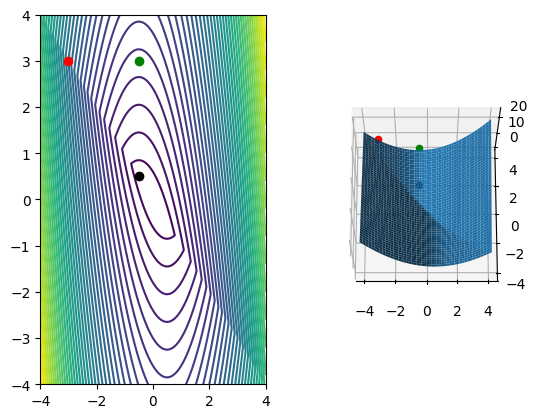

In [9]:
%matplotlib inline
plt.close("all")
sleep_time = 0.2

def fun(x,y):
    return np.abs(x+y) + x**2 

def min_x(y):
    x_grid = np.linspace(-4,4,10000)
    return x_grid[np.argmin(fun(x_grid,y))]
    
def min_y(x):
    y_grid = np.linspace(-4,4,10000)
    return y_grid[np.argmin(fun(x,y_grid))]

    
## function
N_points = 1000
x_grid = np.linspace(-4,4,N_points)
y_grid = np.linspace(-4,4,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

## initial point
x = -3
y = 3

## get minimum over x fixing y
x_min = min_x(y)
y_min = min_y(x_min)

## plotting
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev = 70, azim=270)

## plot function
ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 40)
ax2.plot_surface(X_mesh,Y_mesh, Z_mesh, zorder = -200)

## plot point
ax1.plot(x,y,'o', color = 'r')
ax1.plot(x_min,y,'o', color = 'g')
ax1.plot(x_min,y_min,'o', color = 'k')

ax2.scatter(x,y,fun(x,y)+12,'*', color = 'r',zorder = 200)
ax2.scatter(x_min,y,fun(x_min,y)+12,'*', color = 'g',zorder = 200)
ax2.scatter(x_min,y_min,fun(x_min,y_min)+15,'*', color = 'k',zorder = 200)


fila, columna = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)

print('x min obtained by coordinate descent', x_min)
print('y min obtained by coordinate descent', y_min)

print('x min from function evaluation ', X_mesh[fila,columna])
print('y min from function evaluation ', Y_mesh[fila,columna])

print('Function value at coordinate descent minimum ',fun(x_min,y_min))
print('Function value at coordinate descent minimum from numerical minimum ', fun(X_mesh[fila,columna],Y_mesh[fila,columna]))
print('Function value at (0,0) ', fun(0,0))

This are not always the cases. There might be non-differentiable convex functions for which it works. It is just there is no guarantee.

For example consider:

\begin{split}
f(x,y) = \mid x \mid + \mid y \mid
\end{split}

x min obtained by coordinate descent 4.000004000026536e-06
y min obtained by coordinate descent 4.000004000026536e-06
x min from function evaluation  -0.004004004004003914
y min from function evaluation  -0.004004004004003914
Function value at coordinate descent minimum  8.000008000053072e-06
Function value at coordinate descent minimum from numerical minimum  0.008008008008007828
Function value at (0,0)  0


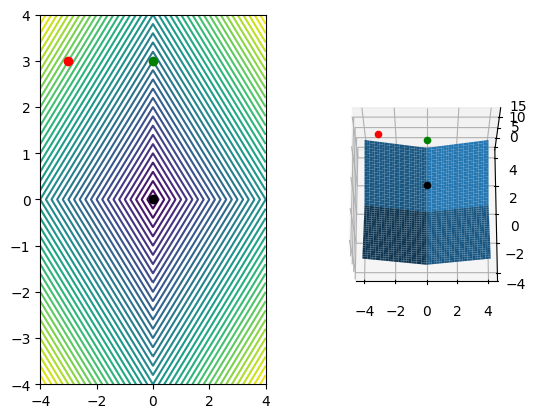

In [10]:
%matplotlib inline
plt.close("all")
sleep_time = 0.2

def fun(x,y):
    return np.abs(x) + np.abs(y)

def min_x(y):
    x_grid = np.linspace(-4,4,1000000)
    return x_grid[np.argmin(fun(x_grid,y))]
    
def min_y(x):
    y_grid = np.linspace(-4,4,1000000)
    return y_grid[np.argmin(fun(x,y_grid))]

    
## function
N_points = 1000
x_grid = np.linspace(-4,4,N_points)
y_grid = np.linspace(-4,4,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

## initial point
x = -3
y = 3

## get minimum over x fixing y
x_min = min_x(y)
y_min = min_y(x_min)

## plotting
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev = 70, azim=270)

## plot function
ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 40)
ax2.plot_surface(X_mesh,Y_mesh, Z_mesh, zorder = -200)

## plot point
ax1.plot(x,y,'o', color = 'r')
ax1.plot(x_min,y,'o', color = 'g')
ax1.plot(x_min,y_min,'o', color = 'k')

ax2.scatter(x,y,fun(x,y)+12,'*', color = 'r',zorder = 200)
ax2.scatter(x_min,y,fun(x_min,y)+12,'*', color = 'g',zorder = 200)
ax2.scatter(x_min,y_min,fun(x_min,y_min)+15,'*', color = 'k',zorder = 200)

fila, columna = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)

print('x min obtained by coordinate descent', x_min)
print('y min obtained by coordinate descent', y_min)

print('x min from function evaluation ', X_mesh[fila,columna])
print('y min from function evaluation ', Y_mesh[fila,columna])

print('Function value at coordinate descent minimum ',fun(x_min,y_min))
print('Function value at coordinate descent minimum from numerical minimum ', fun(X_mesh[fila,columna],Y_mesh[fila,columna]))
print('Function value at (0,0) ', fun(0,0))

It can be proved that if the function is made up from a convex differentiable function and convex coordinate wise functions, then coordinate descent works.

Consider:

\begin{split}
f(x,y) = x^2 + y^2 + \mid y \mid  + \text{max}(0,x)
\end{split}

-0.00040004000400006845
-0.00040004000400006845
-0.004004004004003914
-0.004004004004003914
0.0004003600680096692
0.004036068100132072
0


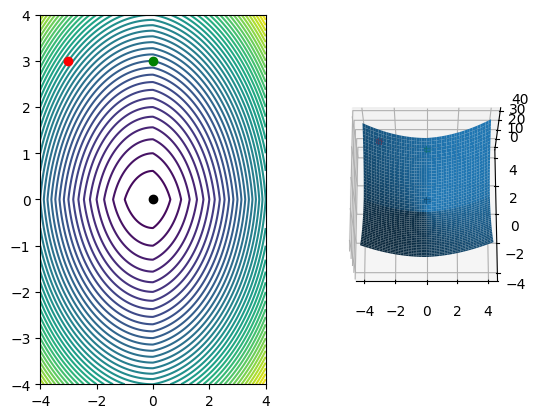

In [11]:
%matplotlib inline
plt.close("all")
sleep_time = 0.2

def fun(x,y):
    return x**2 + y**2 + np.abs(y) + np.maximum(x,0)

def min_x(y):
    x_grid = np.linspace(-4,4,10000)
    return x_grid[np.argmin(fun(x_grid,y))]
    
def min_y(x):
    y_grid = np.linspace(-4,4,10000)
    return y_grid[np.argmin(fun(x,y_grid))]

    
## function
N_points = 1000
x_grid = np.linspace(-4,4,N_points)
y_grid = np.linspace(-4,4,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

## initial point
x = -3
y = 3

## get minimum over x fixing y
x_min = min_x(y)
y_min = min_y(x_min)

## plotting
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev = 70, azim=270)

## plot function
ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 40)
ax2.plot_surface(X_mesh,Y_mesh, Z_mesh, zorder = -200)

## plot point
ax1.plot(x,y,'o', color = 'r')
ax1.plot(x_min,y,'o', color = 'g')
ax1.plot(x_min,y_min,'o', color = 'k')

ax2.scatter(x,y,fun(x,y)+12,'*', color = 'r',zorder = 200)
ax2.scatter(x_min,y,fun(x_min,y)+12,'*', color = 'g',zorder = 200)
ax2.scatter(x_min,y_min,fun(x_min,y_min)+15,'*', color = 'k',zorder = 200)

fila, columna = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)

print(x_min)
print(y_min)

print(X_mesh[fila,columna])
print(Y_mesh[fila,columna])

print(fun(x_min,y_min))
print(fun(X_mesh[fila,columna],Y_mesh[fila,columna]))
print(fun(0,0))

### Coordinate gradient updates

Whenever we cannot exactly minimize accros a dimension, and perform gradient based coordinate update, then there is also no guarantee we will converge and the loss might increase.

Consider:

\begin{split}
f(x,y) = x^2-xy + y^2
\end{split}

In [12]:
%matplotlib tk
plt.close("all")
sleep_time = 1

def fun(x,y):
    return x**2 -x*y + y**2 

def coord_update_x(x,y):
    return 2*x - y

def coord_update_y(x,y):
    return 2*y - x

def grad(x,y):
    return 2*x - y, 2*y - x


## function
N_points = 100
x_grid = np.linspace(-10,10,N_points)
y_grid = np.linspace(-10,10,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

# initial point
x_cd = 5
y_cd = 7

x_gd = 5
y_gd = 7


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=40, azim=90)


ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 20)
ax1.plot(x_cd,y_cd,'o', color = 'k', markersize = 10)
ax1.set_title(f"Loss {fun(x_cd,y_cd)}")

ax2.plot_surface(X_mesh,Y_mesh, Z_mesh)

fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)

lr_gd = 0.5
lr_cd = 0.9999

epochs = 10
for e in range(epochs):
 
    x_cd -= lr_cd * coord_update_x(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    ax1.set_title(f"Loss {fun(x_cd,y_cd)}")
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd -= lr_cd * coord_update_y(x_cd,y_cd)
    
    ax1.plot(x_cd,y_cd,'x', color = 'g', markersize = 5)
    ax1.set_title(f"Loss {fun(x_cd,y_cd)}")
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
   
    ## gradient descent
    gdx, gdy = grad(x_gd,y_gd)
    
    x_gd -= lr_gd * gdx
    y_gd -= lr_gd * gdy
    
    ax1.plot(x_gd,y_gd,'o', color = 'r', markersize = 5)
    ax1.set_title(f"Loss {fun(x_cd,y_cd)}")
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)


### Coordinate descent with multiple modes and coupled variables

Coordinate over multiple modes depends on the initialization to reach the minimum, even if steps can be performed in closed form. This will be the case in the kmeans algorithm. 

To start with consider the uncoupled function:

\begin{split}
f(x,y) = (x^2-1)^2 + y^2
\end{split}

with

\begin{split}
\frac{\partial f(x,y)}{\partial x} = 4x(x^2-1)\\
\frac{\partial f(x,y)}{\partial y} = 2y
\end{split}

we see that partial derivatives are uncoupled and so the solution of optimal $x$ will never depend on the initial choice of $y$. Even coordinate gradient descent will converge to $y = 0$ and one of the either $x=1$ or $x=-1$ depending on the initialization of $x$.

In fact if we can perform exact minimization in both coordinates, which we can, we observe that $y=0$ always. The other coordinate can be selected randomly from withing the two possible values.

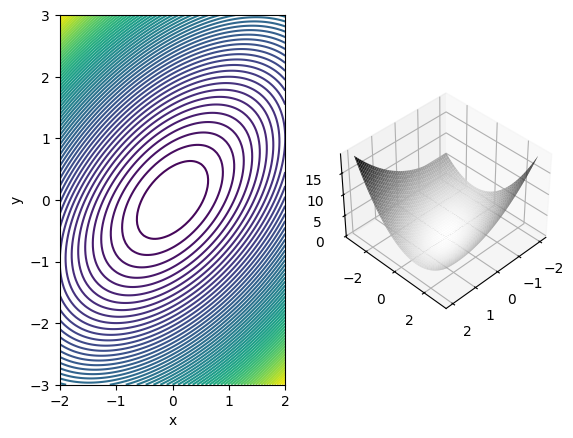

In [13]:
%matplotlib inline
plt.close("all")
sleep_time = 1

## function
N_points = 100
x_grid = np.linspace(-2,2,N_points)
y_grid = np.linspace(-3,3,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=40, azim=45)

ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 70)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.plot_surface(X_mesh,Y_mesh, Z_mesh, cmap = 'gray_r')

#### Coordinate gradient descent on the function

We see that upon initialization coordinate gradient descent leads to different minimas. It will also depend on the learning rate. Exact coordinate descent will converge in just one interation.

In [14]:
%matplotlib tk
plt.close("all")
sleep_time = 1

def fun(x,y):
    return (x**2-1)**2 + y**2

def coord_update_x(x,y):
    return 4*x*(x**2-1) 

def coord_update_y(x,y):
    return 2*y

## function
N_points = 100
x_grid = np.linspace(-2.5,2.5,N_points)
y_grid = np.linspace(-3.5,3.5,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 70, cmap = 'gray_r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.set_title(f"Loss {fun(x_cd,y_cd)}")

lr_cd = 0.1

# initial points
xy_pairs = [(2,3),(-2,3),(2,-3),(-2,-3)]

for x_cd, y_cd in xy_pairs:
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    epochs = 10
    for e in range(epochs):

        x_cd -= lr_cd * coord_update_x(x_cd,y_cd)

        ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
        ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)

        y_cd -= lr_cd * coord_update_y(x_cd,y_cd)

        ax1.plot(x_cd,y_cd,'x', color = 'g', markersize = 5)
        ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)


Consider now the coupled function.

\begin{split}
f(x,y) = (x^2-1)^2 + (x-y)^2
\end{split}

with

\begin{split}
\frac{\partial f(x,y)}{\partial x} = 2x^3-x-y \\
\frac{\partial f(x,y)}{\partial y} = -2\cdot(x-y)
\end{split}


Both partial derivatives are coupled. Note that given an initial value we can obtain optimal updates on $y$ and on $x$. While the optimal value for $y$ is always taking the value of $x$, for $x$ it will depend on the value of $y$. 

For $x$, however, we need to consider the discriminant of the polynomial of the derivative (see https://en.wikipedia.org/wiki/Discriminant)  $2x^3-x-y $ which will change when $y$ changes. The discriminant of a polynomial of order $3$:

\begin{split}
ax^3+bx^2 + cx + d
\end{split}

is given by: $\Delta = b^2c^2-4ac^3-4b^3d-27a^2d^2+18abcd$. The value of the discriminant give us information about its roots (its crosses with $0$). Assuming the coefficients are possitive, then if the discriminant is positive we have $3$ real roots and negative when we have one real and two complex conjugate. When the discriminant is zero then at least two roots are equal and all of them are real. These roots could be minimums or maximums because are the places where the derivative is zero. We are interested in minimums. The second derivative tell us this information.

Finding the roots can be done by reducing the cubic polynomial to a reduced cubic (https://en.wikipedia.org/wiki/Cubic_equation) by a change of variable, which allow us to express the polynomial by:


\begin{split}
x^3 + ex + g = 0\\
e = \frac{3ac-b^2}{3a^2} \\
g = \frac{2b^3-9abc+27a^2d}{27a^3} \\
\end{split}

With this, we can write:

\begin{split}
\Delta_0 = b^2 -3ac\\
\Delta_1 = 2b^3 -9abc + 27a^2d 
\end{split}


Now we compute $\Delta$, and consider three cases:

* 1. When $\Delta > 0$ then we have three real roots.
* 2. When $\Delta = 0$ we have at least two repeated roots, all of them real.
* 3. When $\Delta < 0$ we have one real root and two complex conjugates.

Now let:

\begin{split}
C = \sqrt[3]{\frac{\Delta_1\pm\sqrt{\Delta_1^2-4\Delta_0^3}}{2}}
\end{split}

When we have three real roots then the roots are given by:

\begin{split}
x_k = 2 \sqrt{-\frac{e}{3}} \cos \left [ \frac{1}{3}\text{arccos}\left (\frac{3g}{2e}\sqrt{\frac{-3}{e}} \right ) - \frac{2\pi k}{3} \right ],\,\, k = 0,1,2
\end{split}

When we only have one real root then:

\begin{split}
x = -\frac{1}{3a}\left(b+C+\frac{\Delta_0}{C} \right)
\end{split}

When we have $\Delta_0 = \Delta_1 = 0$ we have one triple root given by:

\begin{split}
x = \frac{-b}{3a}
\end{split}

When we have two real roots one of the being double then:

\begin{split}
x_1 = -\frac{1}{3a}\left(b+C+\frac{\Delta_0}{C}\right) \\
x_2 = -\frac{1}{3a}\left(b-\frac{1}{2}\left(C+\frac{\Delta_0}{C}\right)\right)
\end{split}

All this is known as the Cardano method, where the change of variables has been undone implictely (this is not Algebra class).

Now we have a trick to compute the minimums and/or maximums for coordinate descent on $x$. Given a $y$ we can know the coefficients and can inspect and compute the roots. Then we can see if this roots are a maximum or minimum using the second derivative which is:

\begin{split}
\frac{\partial^2 f(x,y)}{\partial^2 x} = 6x^2-1
\end{split}

if it is a minimum, then we jump there. If it is a maximum then, the only thing we can do, is gradient descent on that coordinate. 

Before that, let's find the values of $y$ for where the polynomial of the derivative have different values. Our polyomial is given by:

\begin{split}
 2x^3-x-y
\end{split}

which implies:

\begin{split}
a = 2 \\
b = 0 \\
c = -1 \\
d = -y
\end{split}

and so we need to find the values for where $\Delta$ changes from negative to $0$ and to possitive. Let's plot the discriminant over a range for $y$.

0.2721655269759087


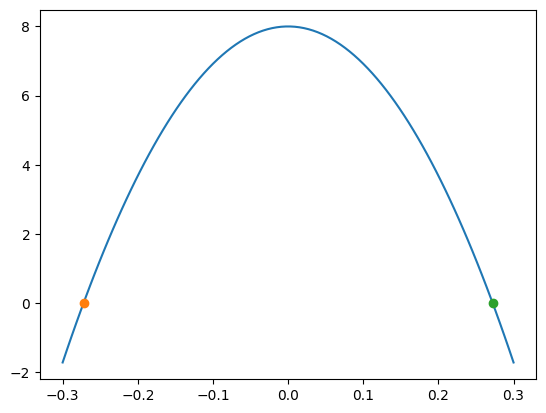

In [15]:
%matplotlib inline
plt.close("all")
def discriminant(a,b,c,d):
    return b**2*c**2 - 4*a*c**3 -4*b**3*d -27*a**2*d**2 + 18*a*b*c*d

a = 2
b = 0
c = -1
y = np.linspace(-0.3,0.3,100)

fig,ax = plt.subplots(1,1)

ax.plot(y, discriminant(a,b,c,-1*y))
ax.plot(-np.sqrt(8/108),discriminant(a,b,c,np.sqrt(8/108)),'o')
ax.plot(np.sqrt(8/108),discriminant(a,b,c,-np.sqrt(8/108)),'o')

print(np.sqrt(8/108))

We see that the line crosses zero on two points. Since it is a quadratic points we can find these points easily from the second order equation that results from substituting the values in the discriminant, and solving for $y$. We have:

\begin{split}
-108y^2 + 8 = 0\\
y = \pm\sqrt{\frac{8}{108}}
\end{split}

These points have been highlighted in the plot. So basically we know that in between these values for $y$ we have 3 roots, and above/blow we have one real. Right at those points we have either two roots one being repeated, or a triple root. 

Let's characterize these roots, because are the points our coordinate descent algorithm must jump to. 

#### Three real roots: $\Delta > 0$
First on the possitive part we have three real roots. Lets compute them:

In [16]:
def compute_e(a,b,c,d):
    return (3*a*c - b**2) / (3*a**2)

def compute_g(a,b,c,d):
    return (2*b**3 -9*a*b*c + 27*a**2*d) / (27*a**3)

def find_real_roots(e,g):
    roots = []
    for k in range(3):
        roots.append( 2*np.sqrt(-e/3)*np.cos(1/3.*np.arccos(3*g/(2*e)*np.sqrt(-3/e)) - (2*np.pi*k/3)) )
    return roots

a = 2
b = 0
c = -1
d = np.sqrt(8/108) - 0.2 #0.2

e = compute_e(a,b,c,d)
g = compute_g(a,b,c,d)

roots = find_real_roots(e,g)

We can check if they are solutions to the polynomial:

Root  0.6678086631639565
Derivative value  5.551115123125783e-17
Minimum

Root  0.07294169832660678
Derivative value  -2.498001805406602e-16
Maximum

Root  -0.7407503614905632
Derivative value  -4.996003610813204e-16
Minimum



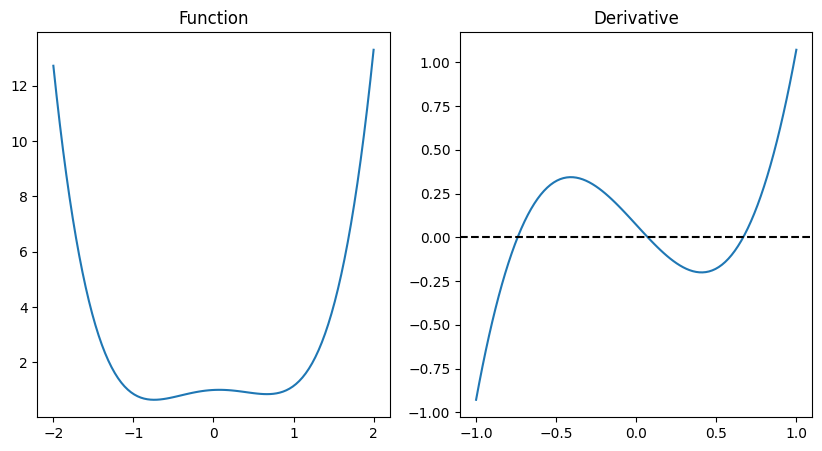

In [17]:
def fun(x,y):
    return (x**2 - 1)**2 + (x-y)**2

def first_derivative(x,y):
    return 2*x**3-x-y

def second_derivative(x,y):
    return 6*x**2-1

x_grid_fun = np.linspace(-2,2,100)
x_grid_derivative = np.linspace(-1,1,100)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.plot(x_grid_fun,fun(x_grid_fun,-d))
ax1.set_title("Function")

ax2.plot(x_grid_derivative,first_derivative(x_grid_derivative,-d))
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_title("Derivative")

for root in roots:
    print('Root ', root)
    print('Derivative value ', first_derivative(root,-d))
    if second_derivative(root,-d) < 0:
        print("Maximum")
    else:
        print("Minimum")
    print("")

#### One real roots: $\Delta < 0$


Root  0.8564578035741502
Derivative value  -4.440892098500626e-16
Minimum



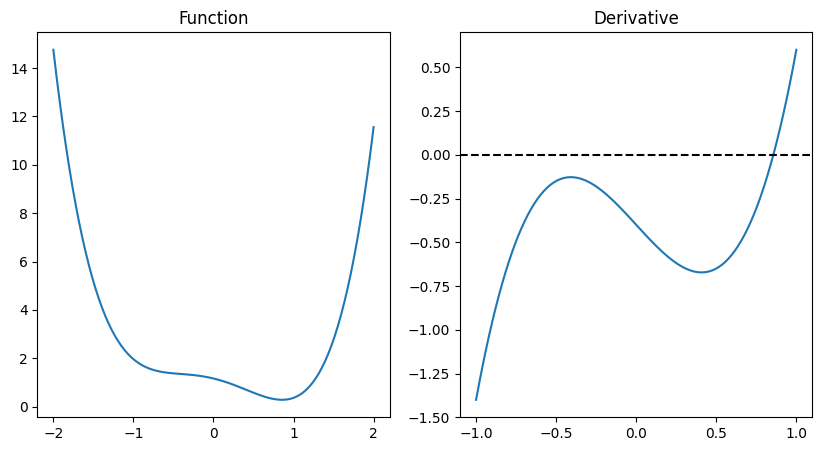

In [18]:
def compute_delta0(a,b,c,d):
    return b**2 -3*a*c

def compute_delta1(a,b,c,d):
    return 2*b**3 - 9*a*b*c + 27*a**2*d

def compute_capital_C(delta_0,delta_1):
    return np.cbrt( ( delta_1 + np.sqrt( delta_1**2 - 4*delta_0**3 ) ) / 2 )

def compute_just_one_real_root(a,b,cap_C,delta_0):
    return -1/(3*a) * (b+cap_C+delta_0 / cap_C)


a = 2
b = 0
c = -1
d = -0.4

delta_0 = compute_delta0(a,b,c,d)
delta_1 = compute_delta1(a,b,c,d)
cap_C = compute_capital_C(delta_0,delta_1)

root =  compute_just_one_real_root(a,b,cap_C,delta_0)

    
x_grid_fun = np.linspace(-2,2,100)
x_grid_derivative = np.linspace(-1,1,100)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.plot(x_grid_fun,fun(x_grid_fun,-d))
ax1.set_title("Function")

ax2.plot(x_grid_derivative,first_derivative(x_grid_derivative,-d))
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_title("Derivative")

for root in [root]:
    print('Root ', root)
    print('Derivative value ', first_derivative(root,-d))
    if second_derivative(root,-d) < 0:
        print("Maximum")
    else:
        print("Minimum")
    print("")

#### Three real roots at least two of them repeated: $\Delta = 0$

This only occurs at:

\begin{split}
y = \pm\sqrt{\frac{8}{108}}
\end{split}


When we have $\Delta_0 = \Delta_1 = 0$ we have one triple root given by:

\begin{split}
x = \frac{-b}{3a}
\end{split}

When we have two real roots one of the being double then:

\begin{split}
x_1 = -\frac{1}{3a}\left(b+C+\frac{\Delta_0}{C}\right) \\
x_2 = -\frac{1}{3a}\left(b-\frac{1}{2}\left(C+\frac{\Delta_0}{C}\right)\right)
\end{split}

At that specific value both deltas are different hence being two roots.

Root  -0.8164965809277259
Derivative value  3.3306690738754696e-16
Minimum

Root  0.40824829046386296
Derivative value  0.0
Maximum



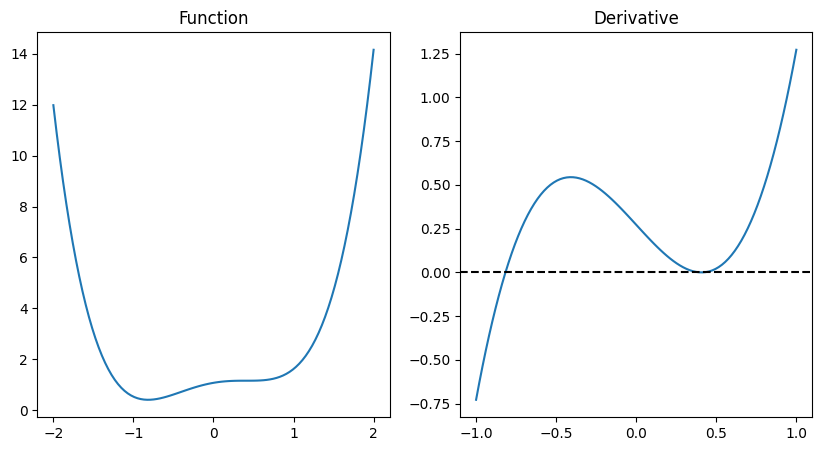

In [19]:
def compute_just_one_real_root(a,b,cap_C,delta_0):
    return -1/(3*a) * (b+cap_C+delta_0 / cap_C)

def compute_the_other_real_root(a,b,C,delta_0):
    return -1/(3*a) * (b-1/2.*(cap_C+delta_0 / cap_C))

a = 2
b = 0
c = -1
d = np.sqrt(8/108)

delta_0 = compute_delta0(a,b,c,d)
delta_1 = compute_delta1(a,b,c,d)

delta_0 = compute_delta0(a,b,c,d)
delta_1 = compute_delta1(a,b,c,d)
cap_C = compute_capital_C(delta_0,delta_1)

root_1 =  compute_just_one_real_root(a,b,cap_C,delta_0)
root_2 =  compute_the_other_real_root(a,b,cap_C,delta_0)


x_grid_fun = np.linspace(-2,2,100)
x_grid_derivative = np.linspace(-1,1,100)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.plot(x_grid_fun,fun(x_grid_fun,-d))
ax1.set_title("Function")

ax2.plot(x_grid_derivative,first_derivative(x_grid_derivative,-d))
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_title("Derivative")

for root in [root_1,root_2]:
    print('Root ', root)
    print('Derivative value ', first_derivative(root,-d))
    if second_derivative(root,-d) < 0:
        print("Maximum")
    else:
        print("Minimum")
    print("")

With all this we are ready to derive a coordinate update rule for $x$ which moves exactly into the minimum. With this, we will be able to see that coordinate descent can depend on the initialization, depending on where we initialize the algorithm.

Given an initial point in the space  $(x_0,y_0)$ the coordinate rule will be:

* 1. Compute $\Delta$ to decide how many roots you should compute.
* 2. Depending on the zone you might get 1 single real root, 2 real roots plus one real root or 3 real roots.
* 3. Check if these roots are maximums or minimums.
* 4. For the minimums compute move randomly to any minimum if there are more than one, or to the single minimum. If all the roots are maximum, move randomly to any of the points of the domain of the expected behaviour (ie the points where the sign of delta changes).


Let's see how the algorithm behaves for different initialization points. Note that since $y$ follows whatever value takes $x$, everything is conditioned by the initialization point of $x$, provided $y$ is the first coordinate updated. If the first coordinate updated is $x$, then the initial value of $y$ will drive the whole optimization. Let's go this way.


We know the critical points where our function on $x$ have different number of roots in the derivative are given at the points:

\begin{split}
y = \pm\sqrt{\frac{8}{108}}
\end{split}

so let's initialize at these points, and see what happens.

In [20]:
%matplotlib tk
# plt.close("all")
sleep_time = 0.0001

def fun(x,y):
    return (x**2-1)**2 +(x-y)**2

def grad(x,y):
    return 2*x**3-x-y, y-x

## exact step
def coord_update_y(x,y):
    return x

## exact step
def coord_update_x(x,y):
    a = 2
    b = 0
    c = -1
    d = -y
    
    delta = discriminant(a,b,c,d)
    
    # three real roots
    if delta > 0:

        e = compute_e(a,b,c,d)
        g = compute_g(a,b,c,d)

        roots = find_real_roots(e,g)
        
    # one or two real roots
    elif delta == 0:
        delta_0 = compute_delta0(a,b,c,d)
        delta_1 = compute_delta1(a,b,c,d)
        cap_C = compute_capital_C(delta_0,delta_1)
        
        roots = []
        roots.append( compute_just_one_real_root(a,b,cap_C,delta_0) )
        
        # there is one more root
        if not(delta_0 == 0 and delta_0 == delta_1):
            roots.append( compute_the_other_real_root(a,b,cap_C,delta_0) )
        
        print(roots)
    # just one real root
    elif delta < 0:

        delta_0 = compute_delta0(a,b,c,d)
        delta_1 = compute_delta1(a,b,c,d)
        cap_C = compute_capital_C(delta_0,delta_1)

        roots = [compute_just_one_real_root(a,b,cap_C,delta_0)]
        
    # check whether they are minimums:
    sel_roots = []
    for root in roots:
        if second_derivative(root,y) > 0:
            sel_roots.append(root)
            
    # case everything are maximums
    if not sel_roots:
        raise NotImplemented("Implement this")
    else:
        y = np.random.choice(sel_roots)
        
    return y

## function
N_points = 100
x_grid = np.linspace(-4.5,4.5,N_points)
y_grid = np.linspace(-4.5,4.5,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 70, cmap = 'gray')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.set_title(f"Loss {fun(x_cd,y_cd)}")


## region with just one single root
xy_pairs = [(1,-np.sqrt(8/108)-3),(-1,-np.sqrt(8/108)-2),(-4,-np.sqrt(8/108)-4),(4,-np.sqrt(8/108)-4)]
# xy_pairs = [(1,np.sqrt(8/108)+3),(-1,np.sqrt(8/108)+2),(-4,np.sqrt(8/108)+4),(4,np.sqrt(8/108)+4)] # np.sqrt(8/108) + 0.1

## region with just three single roots. Will depend on randomness
# xy_pairs = [(-4,np.sqrt(8/108)-0.1),(-4,np.sqrt(8/108)-0.1),(-4,np.sqrt(8/108)-0.1)]

## region with one or two roots.
# xy_pairs = [(4,-np.sqrt(8/108)),(-4,-np.sqrt(8/108)),(1,-np.sqrt(8/108)),(-1,-np.sqrt(8/108))]

## learning rate for gradient descent
lr_gd = 0.01

for (x_cd, y_cd), (x_gd, y_gd) in zip(xy_pairs,xy_pairs):
    
    ax1.cla()
    
    ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 70, cmap = 'gray')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    ax1.set_title(f"Loss {fun(x_cd,y_cd)}")
    
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    ax1.plot(x_gd,y_gd,'*', color = 'C3', markersize = 10)
    
    ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    epochs = 30
    for e in range(epochs):

        ## exact movement
        x_cd = coord_update_x(x_cd,y_cd)
        
        ax1.plot(x_cd,y_cd,'o', color = 'C0', markersize = 5)
        ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)
        
        # exact movement
        y_cd = coord_update_y(x_cd,y_cd)
    
        ax1.plot(x_cd,y_cd,'x', color = 'C1', markersize = 5)
        ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)
        
        ## gradient descent
        grad_x, grad_y = grad(x_gd,y_gd)
        x_gd -= lr_gd*grad_x
        y_gd -= lr_gd*grad_y
        
        ax1.plot(x_gd,y_gd,'*', color = 'C3', markersize = 10)
        


#### Coordinate gradient descent can make all this vacuous because now there are not exact steps and we can move out the roots

In [21]:
%matplotlib tk
# plt.close("all")
sleep_time = 0.0001

def fun(x,y):
    return (x**2-1)**2 +(x-y)**2

## approximate step. Need to use gradient method
def coord_update_x(x,y):
    return 2*x**3-x-y

## exact step
def coord_update_y(x,y):
    return x

## function
N_points = 100
x_grid = np.linspace(-4.5,4.5,N_points)
y_grid = np.linspace(-4.5,4.5,N_points)

X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
Z_mesh = fun(X_mesh,Y_mesh)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.contour(X_mesh,Y_mesh, Z_mesh, levels = 70, cmap = 'gray')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.set_title(f"Loss {fun(x_cd,y_cd)}")

lr_cd = 0.05

# initial points
xy_pairs = [(1,-np.sqrt(8/108)-3),(-1,-np.sqrt(8/108)-2),(-4,-np.sqrt(8/108)-4),(4,-np.sqrt(8/108)-4)] # np.sqrt(8/108) + 0.1

for x_cd, y_cd in xy_pairs:
    ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
    ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    epochs = 30
    for e in range(epochs):

        x_cd -= lr_cd * coord_update_x(x_cd,y_cd)

        ax1.plot(x_cd,y_cd,'o', color = 'b', markersize = 5)
        ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)

        # exact movement
        y_cd = coord_update_y(x_cd,y_cd)

        ax1.plot(x_cd,y_cd,'x', color = 'g', markersize = 5)
        ax1.set_title(f"Loss {fun(x_cd,y_cd):.3f}")

        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)

In [22]:
plt.close("all")
x = np.linspace(-2,2,1000)

for val in [-0.1,1,2,3]:
    y =  2*x**3-x +val
    plt.plot(x, y)

## Discrete optimization

One of the advantages of coordinate descent over gradient guided optimization is that we can optimize over discrete spaces, where gradient guided optimization cannot be used because the gradient on these spaces is not define. Perhaps even better is the fact that we can optimize over joint spaces between discrete and continous variables.

Greedy minimization over a discrete variable can be performed by evaluating the function on the whole discrete space, and selecting the value which provides minimum loss.


Consider the following function. Given $x\in\mathbb{R}$ and $y \in \mathcal{Y} \subset \mathbb{Z}$. For example $\mathcal{Y} = \{-3,-2,-1,0,1,2,3\}$, we have the function.

\begin{split}
f(x,y) = \sin(3x^2) + y^2
\end{split}

In [23]:
%matplotlib tk
plt.close("all")
sleep_time = 2

x_grid = np.linspace(-2, 2, 400)
y_grid = np.array([-3, -2, -1, 0, 1, 2, 3])

def fun(x,y):
    c = np.array([-3.0, -1.0, 0.5, 2.0, 4.0])   # centros c_y
    return np.sin(3*x**2) + y**2
     
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax1.view_init(elev=10, azim=-15)
ax2.view_init(elev=10, azim=-45)

# Plot funs
Z = [fun(x_grid,y) for y in y_grid]

for y, z in zip(y_grid, Z):
    ax1.plot(x_grid, np.full_like(x_grid,y), z, label=f"y={y}")
    ax2.plot(x_grid, np.full_like(x_grid,y), z, label=f"y={y}")



Coordinate descent here is performed by approximate step on coordinate $x$ and exact step on coordinate $y$. For $x$ perform gradient descent step using:

\begin{split}
\frac{\partial f(x,y)}{\partial x} = 6x\cos(3x^2)
\end{split}

Exact step on $y$ is given by setting:

\begin{split}
y = 0
\end{split}

since by greedy minimization we see that $y^2$ achieves its minimum there.

In [24]:
%matplotlib tk
plt.close("all")
sleep_time = 1

x_grid = np.linspace(-2, 2, 400)

y_grid = np.array([-3, -2, -1, 0, 1, 2, 3])

def fun(x,y):
    return np.sin(3*x**2) + y**2

def coord_update_x(x,y):
    return np.cos(3*x**2)*6*x

def coord_update_y(x,y):
    return 0
    
              
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=-15)

# Plot funs
Z = [fun(x_grid,y) for y in y_grid]

for y, z in zip(y_grid, Z):
    ax.plot(x_grid, np.full_like(x_grid, y), z, label=f"y={y}")


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()

plt.tight_layout()
plt.show()


# initial point
x_cd = 1.5 #-0.5 # 1.5
y_cd = -2

ax.plot(x_cd,y_cd,fun(x_cd,y_cd),'o', color = 'k', markersize = 5)
fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)

lr_cd = 0.01

## coordinate descent
epochs = 10
for e in range(epochs):
 
    x_cd -= lr_cd * coord_update_x(x_cd,y_cd)
    
    ax.plot(x_cd,y_cd,fun(x_cd,y_cd),'x', color = 'k', markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax.plot(x_cd,y_cd,fun(x_cd,y_cd),'x', color = 'k', markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    if e == 0:
        ax.view_init(elev=10, azim=-45)
        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)

Another example, consider now

\begin{split}
f(x,y) = 3(x-c(y))^2 + y; \\
y \in \{-3,-2,-1\} ; \\
c: \{-3,-2,-1\} \to \{-1.5,-1,5\}
\end{split}

Here we see that minimization over $x$ can change the optimal $y$, and we move more than once through curves.

In [27]:
%matplotlib tk
plt.close("all")
sleep_time = 1

x_grid = np.linspace(-5, 5, 400)

y_grid = np.array([-3, 1]) #, 1, 3, 5])

def fun(x,y):
    fun_dict = {
        -3: lambda x: (x)**2 + y, #+ np.sin(y),
         #-1: lambda x: (x + 0.5)**2 + y**3,
         1: lambda x: 5*np.cos(x-4)+5,
         #3: lambda x: (x + 0.5)**2 -y,
         #5: lambda x: (x - 1)**2 + np.sin(y)
    }
    
    return fun_dict[y](x)

def coord_update_x(x,y):
    deriv_dict = {
        -3: lambda x: 2*x,
         #-1: lambda x: 2*(x + 0.5),
         1: lambda x:  -5*np.sin(x-4),
         #3: lambda x: 2*(x - 0.5),
         #5: lambda x: 2*(x - 1)
    }
    return deriv_dict[y](x)

def coord_update_y(x,y):
    fun_val = np.array([fun(x,y) for y in y_grid ])
    y_opt = y_grid[np.argmin(fun_val)]
    return y_opt 
              
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=-90)

# Plot funs
Z = [fun(x_grid,y) for y in y_grid]

for y, z in zip(y_grid, Z):
    ax.plot(x_grid, np.full_like(x_grid, y), z, label=f"y={y}")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()

plt.tight_layout()
plt.show()


# initial point
x_cd = 4.5
y_cd = -3

ax.plot(x_cd,y_cd,fun(x_cd,y_cd),'*', color = 'k', markersize = 10)
fig.canvas.draw()
fig.canvas.flush_events()
time.sleep(sleep_time)

lr_cd = 0.1

## coordinate descent
epochs = 20
for e in range(epochs):
 
    x_cd -= lr_cd * coord_update_x(x_cd,y_cd)
    
    ax.plot(x_cd,y_cd,fun(x_cd,y_cd),'*', color = 'k', markersize = 10)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    y_cd = coord_update_y(x_cd,y_cd)
    
    ax.plot(x_cd,y_cd,fun(x_cd,y_cd),'*', color = 'k', markersize = 10)
    
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(sleep_time)
    
    if e == 0:
        ax.view_init(elev=10, azim=-90)
        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(sleep_time)


KeyboardInterrupt: 

## TODO

* Add all the theory surrounding coorindate descent and why it achieves its minimum.
* Add theory that shows that when the funciton is non-differentiable coordinate might not work.
* Add theory showing that partial steps can make coordinate do not work.
* What happens when one coordinate depends on the value of the others regarding optimallity?
* Explain when and how is faster than gradient descent.
* Example of optimal learning rate in gradient descent with a funciton with non constant curvature such as $x^4$ and also with x^2 bad conditioned (apepinado).